In [51]:
import pandas as pd
import numpy as np

df = pd.read_csv("../Dataset/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\Swap\AppData\Local\Temp\ipykernel_4148\2946213269.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='Set1')


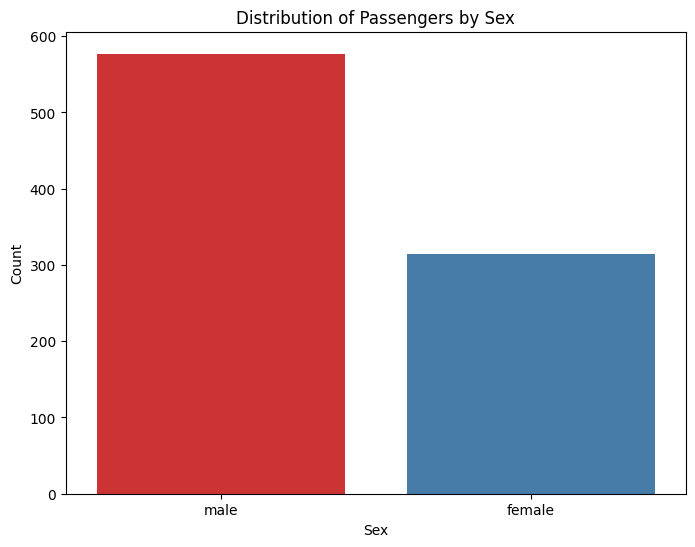

C:\Users\Swap\AppData\Local\Temp\ipykernel_4148\2946213269.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette='Set2')


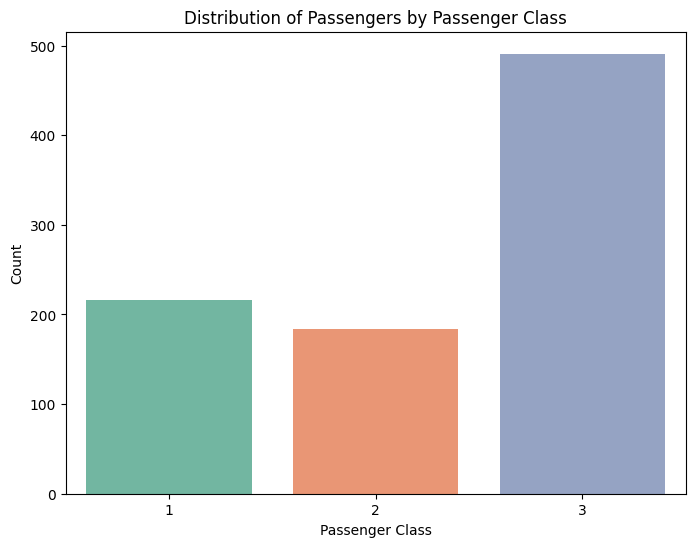

C:\Users\Swap\AppData\Local\Temp\ipykernel_4148\2946213269.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=df, palette='Set3')


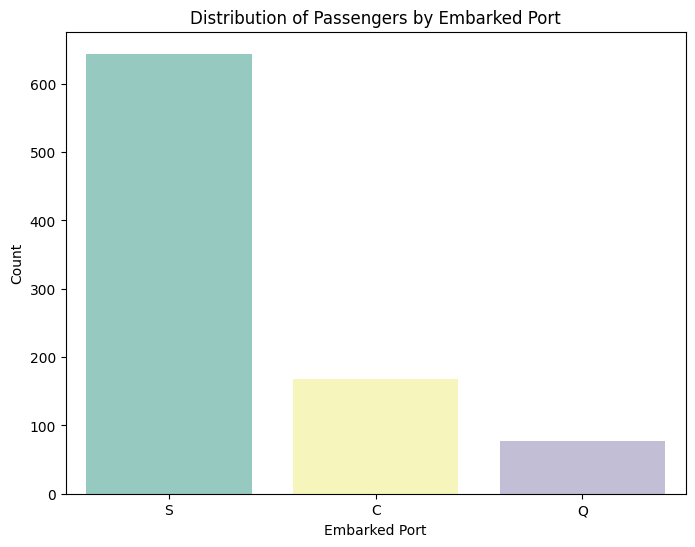

C:\Users\Swap\AppData\Local\Temp\ipykernel_4148\2946213269.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set4')


ValueError: 'Set4' is not a valid palette name

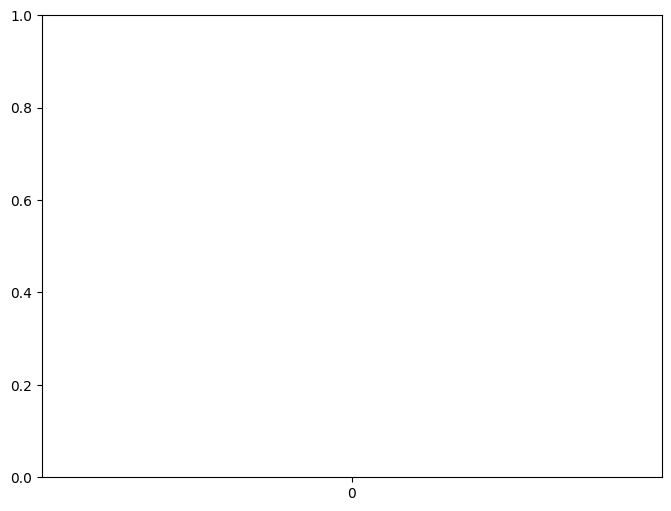

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=df, palette='Set1')
plt.title('Distribution of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=df, palette='Set2')
plt.title('Distribution of Passengers by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', data=df, palette='Set3')
plt.title('Distribution of Passengers by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df, palette='Set4')
plt.title('Distribution of Passengers by Survival')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


In [52]:
print("Dataset Length : ",len(df))
print("Dataset shape : ",df.shape)

Dataset Length :  891
Dataset shape :  (891, 12)


In [53]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
df.columns[df.isna().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [55]:
df.Age = df.Age.fillna(df.Age.mean())

In [56]:
df.columns[df.isna().any()]

Index(['Cabin', 'Embarked'], dtype='object')

In [58]:
df.duplicated().sum()

0

In [59]:
x = df.drop(['Survived','PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')
y = df['Survived']
x.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [60]:
from sklearn.preprocessing import LabelEncoder

lc_sex = LabelEncoder()

x['Sex'] = lc_sex.fit_transform(x['Sex'])
x.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [61]:
y.head()


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=20)

x_train.head()

,Pclass,Sex,Age,Fare
773,3,1,29.699118,7.2250
88,1,0,23.000000,263.0000
136,1,0,19.000000,26.2833
785,3,1,25.000000,7.2500
599,1,1,49.000000,56.9292


In [66]:
print(len(x_train))
print(len(x_test))
print(len(x))

623
268
891


In [67]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(x_train,y_train)

GaussianNB()

In [68]:
y_predict_train = model.predict(x_train)

In [74]:
from sklearn.metrics import accuracy_score,r2_score

print("Accuracy Score : ",accuracy_score(y_train,y_predict_train)*100)
print(model.score(x_train,y_train))
print("R2 Score : ",r2_score(y_train,y_predict_train)*100)

Accuracy Score :  77.84911717495987
0.7784911717495987
R2 Score :  7.031013452138946


In [75]:
test = pd.DataFrame({'Acutal Value ': y_train , 'Predict Value ': y_predict_train})
test

,Acutal Value,Predict Value
773,0,0
88,1,1
136,1,1
785,0,0
599,1,0
...,...,...
218,1,1
223,0,0
271,1,0
474,0,1


In [76]:
y_predict_test = model.predict(x_test)
test = pd.DataFrame({'Acutal Value ': y_test , 'Predict Value ': y_predict_test})
test

,Acutal Value,Predict Value
347,1,1
674,0,0
791,0,0
836,0,0
56,1,1
...,...,...
222,0,0
543,1,0
613,0,0
541,0,1


In [83]:
model.score(x_test,y_test)

0.7686567164179104